# The Business Problem:

I'm trying to build a system where a user can enter their issue with a product they bought, and can see the estimated time the company would need to solve their problem.

# Importing the Data
I have data on customer support tickets from the following source: https://www.kaggle.com/datasets/suraj520/customer-support-ticket-dataset

It contains certain demographic information about the customer, like their age and gender, the product they're seeking support for, the issue they are facing, status, resolution and priority, among other colums.

In [1]:
import pandas as pd

df = pd.read_csv('customer_support_tickets.csv')
df

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaN,NaN,NaN
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaN,NaN,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


## Creating Age Groups from Age

In [2]:
# Define custom age group labels
age_bins = [0, 20, 25, 30, 35, 40, 45, 50, 55, 60, float('inf')]
age_labels = ['20 or Less', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '60 or More']

# Apply binning
df['Age Group'] = pd.cut(df['Customer Age'], bins=age_bins, labels=age_labels, right=False)

df = df[['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age', 'Age Group',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating']]

df

,Ticket ID,Customer Name,Customer Email,Customer Age,Age Group,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,31-35,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,41-45,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,46-50,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,26-30,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,60 or More,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,21-25,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaN,NaN,NaN
8465,8466,Lori Davis,russell68@example.com,27,26-30,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaN,NaN,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,56-60,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,51-55,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


# Basic Plots of Data

## Demographics

### Gender

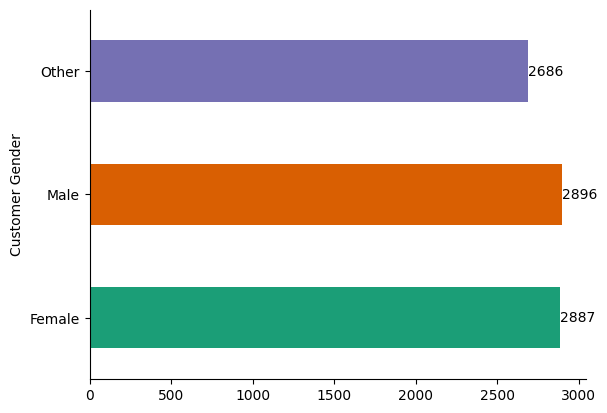

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plot
ax = df.groupby('Customer Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

# Remove top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

### Age

<ipython-input-4-14e29e7aaf85>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = df.groupby('Age Group').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))


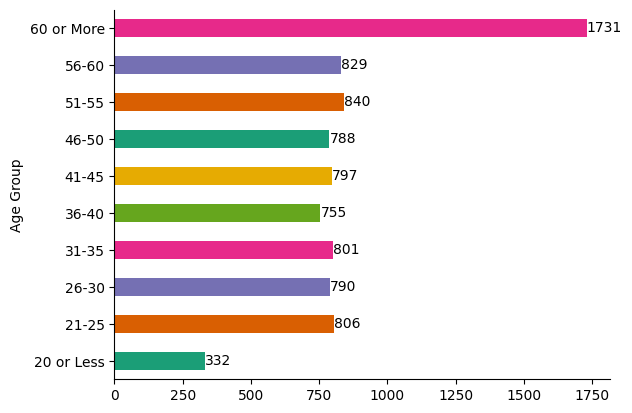

In [4]:
#Plot
ax = df.groupby('Age Group').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

# Remove top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

## Ticket Information

###Ticket Type

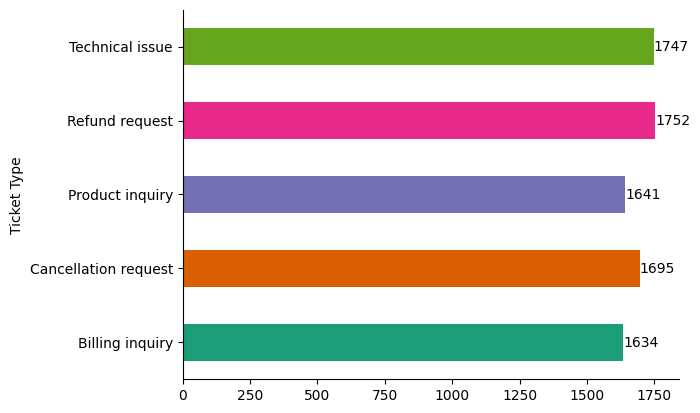

In [5]:
# Plot
import matplotlib.pyplot as plt
import seaborn as sns

ax = df.groupby('Ticket Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

# Remove top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

###Ticket Priority

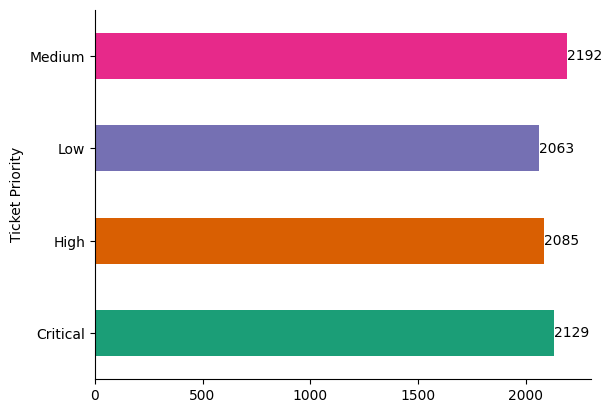

In [6]:
# Plot
ax = df.groupby('Ticket Priority').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

# Remove top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

### Ticket Status

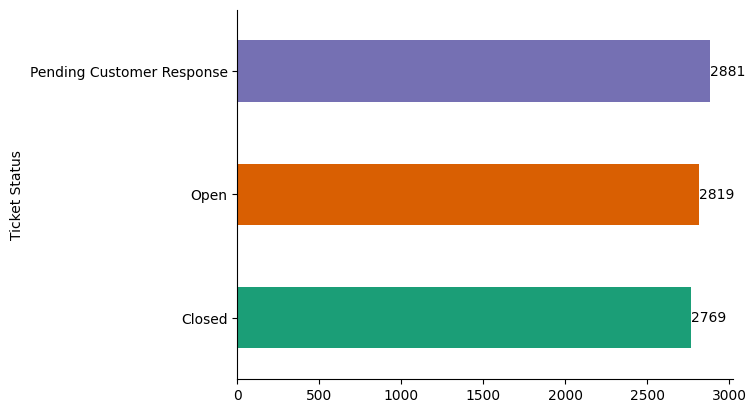

In [7]:
# Plot
ax = df.groupby('Ticket Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

# Remove top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

# Finding the time it takes to resolve a ticket

In [8]:
# Ensure 'First Response Time' and 'Time to Resolution' are in datetime format
df['First Response Time'] = pd.to_datetime(df['First Response Time'])
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'])

# Calculate resolution time in hours
df['Resolution Time (hours)'] = (df['Time to Resolution'] - df['First Response Time']).dt.total_seconds() / 3600
df['Resolution Time (hours)'] = df['Resolution Time (hours)'].round(2)
df['Resolution Time (hours)'] = df['Resolution Time (hours)'].abs()

# Display the updated DataFrame
df

,Ticket ID,Customer Name,Customer Email,Customer Age,Age Group,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution Time (hours)
0,1,Marisa Obrien,carrollallison@example.com,32,31-35,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaT,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,41-45,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaT,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,46-50,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,6.85
3,4,Christina Dillon,bradleyolson@example.org,27,26-30,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,5.53
4,5,Alexander Carroll,bradleymark@example.com,67,60 or More,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,19.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,21-25,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaT,NaT,NaN,NaN
8465,8466,Lori Davis,russell68@example.com,27,26-30,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaT,NaT,NaN,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,56-60,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0,5.22
8467,8468,Steven Rodriguez,fpowell@example.org,54,51-55,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0,12.93


# Separating Closed Tickets for better accuracy

This is because only resolved issues have a non - null resolution time.

In [9]:
closed = df[df['Ticket Status'] == 'Closed']
closed

,Ticket ID,Customer Name,Customer Email,Customer Age,Age Group,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution Time (hours)
2,3,Christopher Robbins,gonzalestracy@example.com,48,46-50,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,6.85
3,4,Christina Dillon,bradleyolson@example.org,27,26-30,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,5.53
4,5,Alexander Carroll,bradleymark@example.com,67,60 or More,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,19.68
10,11,Joseph Moreno,mbrown@example.org,48,46-50,Male,Nintendo Switch,2021-01-19,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,Measure tonight surface feel forward.,High,Phone,2023-06-01 17:46:49,2023-05-31 23:51:49,1.0,17.92
11,12,Brandon Arnold,davisjohn@example.net,51,51-55,Male,Microsoft Xbox Controller,2021-10-24,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Closed,Measure there house management pick knowledge ...,High,Chat,2023-06-01 12:05:51,2023-06-01 09:27:51,1.0,2.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8452,8453,Craig Forbes,jessica60@example.org,62,60 or More,Female,MacBook Pro,2020-03-29,Refund request,Display issue,I'm having an issue with the {product_purchase...,Closed,Interesting show must successful.,Critical,Phone,2023-06-01 14:14:05,2023-06-01 05:47:05,3.0,8.45
8453,8454,Paula Vazquez,wanderson@example.com,61,60 or More,Other,iPhone,2020-06-20,Billing inquiry,Peripheral compatibility,The {product_purchased} is unable to establish...,Closed,Skill expect admit and.,High,Chat,2023-06-01 12:56:06,2023-06-01 04:45:06,5.0,8.18
8455,8456,Ariel Lee,thompsonsamuel@example.org,54,51-55,Other,Dyson Vacuum Cleaner,2021-02-02,Billing inquiry,Refund request,"I've recently set up my {product_purchased}, b...",Closed,Say position key appear behavior.,High,Email,2023-06-01 14:15:07,2023-06-01 06:58:07,1.0,7.28
8466,8467,Michelle Kelley,ashley83@example.org,57,56-60,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0,5.22


In [10]:
# Checking for Null Values
closed['Resolution Time (hours)'].isna().sum()

0

# Separating my dependent and independent variables

## Independent variables:
1. 'Ticket Subject',
2. 'Ticket Type',
3. 'Ticket Channel'

## Dependent Variables

### For Regression:
Resolution Time

### For Classification
Priority



In [11]:
# Importing numpy
import numpy as np

np.random.seed(500)

# Defining the independent variables
X = closed[['Ticket Subject','Ticket Type','Ticket Channel']]

# Dependent Variable for regression
y_pred = closed['Resolution Time (hours)']
# Dependent variable for classification
y_class = closed['Ticket Priority']

# Since data is primarily text, I have dummy encoded the categories in X
X = pd.get_dummies(X)


# Splitting out the train and test data
from sklearn.model_selection import train_test_split
#Regression
X_train, X_test, y_pred_train, y_pred_test = train_test_split(X, y_pred
                                                               , test_size=0.1, random_state=42)
#Classification
X_train, X_test, y_class_train, y_class_test = train_test_split(X, y_class
                                                               , test_size=0.1, random_state=42)

# Prediction Resolution Time

In [12]:
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

# Build the simple XGBoost model pipeline
regressor = Pipeline(steps=[
    ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42))
])

# Fit the model
regressor.fit(X_train, y_pred_train)

# Predict on the test set
y_pred_res= regressor.predict(X_test)

# Evaluate the model using R² score
r2 = r2_score(y_pred_test, y_pred_res)
print(f'R² score: {r2:.2f}')

# Check if the R² score is satisfactory
if r2 >= 0.90:
    print("Achieved an accuracy of 90% or higher!")
else:
    print("Accuracy is below 90%. Further adjustments might be needed.")


R² score: -0.18
Accuracy is below 90%. Further adjustments might be needed.


# Classifying Priority

In [13]:
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV

# Build the XGBoost classification model pipeline
classifier = Pipeline(steps=[
    ('classifier', XGBClassifier(objective='multi:softmax', random_state=42))
])

label_encoder = preprocessing.LabelEncoder()

# Encode labels
y_class_train = label_encoder.fit_transform(y_class_train)
y_class_test = label_encoder.fit_transform(y_class_test)

# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7],
    'classifier__subsample': [0.7, 0.8, 1.0],
    'classifier__colsample_bytree': [0.7, 0.8, 1.0]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(classifier, param_grid, cv=3, n_jobs=-1, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_class_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_class_res = best_model.predict(X_test)

# Evaluate the model using accuracy score and classification report
accuracy = accuracy_score(y_class_test, y_class_res)
print(f'Accuracy: {accuracy:.2f}')

# Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_class_test, y_class_res))

# Check if the accuracy score is satisfactory
if accuracy >= 0.90:
    print("Achieved an accuracy of 90% or higher!")
else:
    print("Accuracy is below 90%. Further adjustments might be needed.")

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Accuracy: 0.21

Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.22      0.21        69
           1       0.21      0.24      0.23        62
           2       0.19      0.13      0.16        68
           3       0.24      0.26      0.25        78

    accuracy                           0.21       277
   macro avg       0.21      0.21      0.21       277
weighted avg       0.21      0.21      0.21       277

Accuracy is below 90%. Further adjustments might be needed.


# Gradio Deployment

In [14]:
!pip install gradio

In [17]:
import gradio as gr
import random
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor, XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, accuracy_score
from sklearn import preprocessing

# Assume that X_train, y_pred_train, and y_class_train are already prepared
# and the regression and classification models are already trained

# Define pre-trained models (from previous code)
# For this demo, assume both the regressor and classifier are ready to use

# Function to predict hours and priority based on user input
def predict_ticket(subject, ticket_type, channel):
    # Simulate a user's input into a dataframe format to feed into models
    input_data = pd.DataFrame([[subject, ticket_type, channel]], columns=['Ticket Subject', 'Ticket Type', 'Ticket Channel'])

    # Predict resolution time (regression model)
    pred_hours = regressor.predict(input_data)[0]

    # Predict ticket priority (classification model)
    pred_priority_label = classifier.predict(input_data)[0]

    # Decode the priority class label back to original value
    priority = label_encoder.inverse_transform([pred_priority_label])[0]

    # Generate a random ticket number for the user
    ticket_number = random.randint(100000, 999999)

    # Return the response with predicted values
    return (f"Thank you for making a request with us. "
            f"Your request is assigned a ticket numbered {ticket_number}. "
            f"It will be solved within {int(pred_hours)} hours on a {priority} priority basis.")

# Define possible options for dropdowns
ticket_subjects = df['Ticket Subject'].unique().tolist()
ticket_types = df['Ticket Type'].unique().tolist()
ticket_channels = df['Ticket Channel'].unique().tolist()

# Create the Gradio interface
gradio_interface = gr.Interface(
    fn=predict_ticket,  # Prediction function
    inputs=[
        gr.Dropdown(ticket_subjects, label="Ticket Subject"),
        gr.Dropdown(ticket_types, label="Ticket Type"),
        gr.Dropdown(ticket_channels, label="Ticket Channel")
    ],
    outputs="text",
    title="Ticket Resolution Time & Priority Prediction",
    description="Select the ticket details and get an estimated resolution time and priority."
)

# Launch the Gradio app
gradio_interface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://c7ed1347db70de5491.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
